### Working with Collected data Part 1

##### Now that we have stored our data into a pikle file, we can proceed to load it into our program.

In [1]:
import plotly.plotly as py
import plotly.graph_objs as go
import networkx as nx
import pandas as pd

In [2]:
#df_tcp_udp = pd.read_pickle("tcp_udp_dataframe.pkl")
df_icmp = pd.read_pickle("icmp_dataframe.pkl")

### List the contents of your dataframe

In [3]:
df_icmp[0:10]

Timestamp  type status         ip       client_ip  bytes_in  \
0  2018-11-29T00:03:36.095Z  icmp     OK  10.1.1.14   113.59.38.202        68   
1  2018-11-29T00:03:36.598Z  icmp     OK  10.1.1.14    36.33.158.10        68   
2  2019-01-03T02:30:19.172Z  icmp     OK  10.1.1.26   46.234.125.89        16   
3  2018-11-29T00:03:34.059Z  icmp     OK  10.1.1.14   36.66.223.243        68   
4  2018-11-29T00:03:34.580Z  icmp     OK  10.1.1.14     42.56.86.10        68   
5  2018-12-10T00:00:00.771Z  icmp     OK  10.1.1.40   206.117.25.90         4   
6  2018-12-16T00:00:08.358Z  icmp     OK  10.1.1.23  195.251.255.69         4   
7  2018-11-29T00:03:31.467Z  icmp     OK  10.1.1.14  221.229.203.10        68   
8  2018-11-29T00:03:31.473Z  icmp     OK  10.1.1.14   101.75.226.49        68   
9  2018-11-29T00:03:31.560Z  icmp     OK  10.1.1.14   223.111.17.10        68   

   bytes_out  
0         68  
1         68  
2         16  
3         68  
4         68  
5          4  
6          4  
7         68  
8         68  
9         68

### Filtering your data in Pandas

##### Since your datadrame contains all the information pulled from elasticsearh using a general query, you can use Pandas to generate a new dataframe with specific imformation:

In [4]:
df_filtered = df_icmp[((df_icmp['ip']=='10.1.1.65') | (df_icmp['ip']=='10.1.1.4')) & (df_icmp['bytes_in'] < 15)]
G=nx.from_pandas_edgelist(df_filtered, 'ip', 'client_ip', ['bytes_in', 'bytes_out'])
#G=nx.from_pandas_edgelist(df_icmp, 'ip', 'client_ip', ['bytes_in', 'bytes_out'])
df_filtered

Timestamp  type status         ip        client_ip  \
32      2018-11-03T00:00:09.664Z  icmp     OK   10.1.1.4   65.123.202.139   
174     2018-11-26T00:00:47.354Z  icmp     OK  10.1.1.65      14.98.4.174   
221     2019-01-05T00:01:59.410Z  icmp     OK   10.1.1.4     23.105.70.70   
534     2018-10-27T00:01:56.976Z  icmp     OK  10.1.1.65   65.123.202.139   
850     2018-12-25T00:04:34.554Z  icmp     OK   10.1.1.4  195.169.125.251   
5049    2019-01-06T02:52:31.492Z  icmp     OK   10.1.1.4    45.114.116.85   
5294    2018-11-26T00:08:07.118Z  icmp     OK  10.1.1.65    129.82.138.44   
5311    2018-12-07T00:14:56.685Z  icmp     OK   10.1.1.4  192.172.226.146   
5423    2018-10-29T01:26:24.401Z  icmp     OK  10.1.1.65    71.19.250.131   
5461    2018-12-10T00:20:20.282Z  icmp     OK   10.1.1.4      128.1.40.82   
5497    2018-12-19T00:20:34.606Z  icmp     OK   10.1.1.4  195.169.125.251   
5526    2018-12-25T00:20:21.580Z  icmp     OK   10.1.1.4    129.82.138.44   
5609    2018-12-13T00:13:58.188Z  icmp     OK   10.1.1.4    206.117.25.90   
5680    2018-11-11T00:11:10.902Z  icmp     OK  10.1.1.65    107.161.88.35   
5681    2018-11-11T00:11:10.521Z  icmp     OK   10.1.1.4    107.161.88.35   
5745    2018-11-22T09:47:38.359Z  icmp     OK   10.1.1.4   14.153.239.183   
5830    2018-12-28T00:25:24.357Z  icmp     OK   10.1.1.4    50.116.17.183   
6011    2018-12-15T02:59:59.155Z  icmp     OK   10.1.1.4   159.203.37.103   
6069    2018-12-04T00:23:03.877Z  icmp     OK   10.1.1.4   31.192.111.248   
6074    2018-10-27T00:16:08.097Z  icmp     OK   10.1.1.4   195.251.255.69   
6145    2018-11-25T00:04:56.636Z  icmp     OK   10.1.1.4  192.172.226.146   
6594    2018-11-02T00:13:33.393Z  icmp     OK  10.1.1.65  122.224.230.178   
6780    2018-12-14T00:40:38.158Z  icmp     OK   10.1.1.4     1.194.229.82   
7078    2018-12-08T00:33:37.278Z  icmp     OK   10.1.1.4    218.77.106.14   
7384    2018-12-12T00:40:16.482Z  icmp     OK   10.1.1.4    139.162.189.5   
7597    2018-11-05T00:16:19.253Z  icmp     OK   10.1.1.4  195.169.125.251   
8166    2018-12-20T00:44:56.296Z  icmp     OK   10.1.1.4  192.172.226.146   
8441    2018-12-04T00:36:42.558Z  icmp     OK   10.1.1.4    206.117.25.90   
8507    2018-11-04T00:21:16.915Z  icmp     OK  10.1.1.65    27.151.115.81   
8554    2018-11-17T04:58:25.060Z  icmp     OK  10.1.1.65    79.170.25.234   
...                          ...   ...    ...        ...              ...   
117733  2018-11-05T21:52:14.160Z  icmp     OK   10.1.1.4     23.105.70.70   
117768  2018-11-05T21:52:14.160Z  icmp     OK   10.1.1.4     23.105.70.70   
117807  2018-11-20T23:53:31.769Z  icmp     OK  10.1.1.65    60.185.93.100   
118039  2018-10-31T21:58:44.033Z  icmp     OK   10.1.1.4   172.104.94.121   
118059  2018-11-20T23:47:35.161Z  icmp     OK   10.1.1.4    129.82.138.44   
118115  2018-11-25T23:52:33.738Z  icmp     OK   10.1.1.4   37.143.130.124   
118189  2018-11-11T22:45:25.455Z  icmp     OK  10.1.1.65   185.186.78.109   
118212  2018-11-25T23:52:28.049Z  icmp     OK   10.1.1.4   37.143.130.124   
118268  2018-11-03T21:41:38.765Z  icmp     OK  10.1.1.65   195.251.255.69   
118269  2018-11-25T23:52:34.079Z  icmp     OK   10.1.1.4   37.143.130.124   
118315  2018-11-11T22:45:25.840Z  icmp     OK   10.1.1.4   185.186.78.109   
118438  2018-10-31T21:59:54.146Z  icmp     OK  10.1.1.65   65.123.202.139   
118477  2018-11-01T23:27:21.942Z  icmp     OK   10.1.1.4  192.172.226.141   
118519  2018-10-31T21:58:43.869Z  icmp     OK  10.1.1.65   172.104.94.121   
118540  2018-10-31T22:21:17.169Z  icmp     OK   10.1.1.4  195.169.125.251   
118564  2018-11-04T22:33:07.310Z  icmp     OK  10.1.1.65     128.1.132.73   
118601  2018-11-04T22:33:07.584Z  icmp     OK   10.1.1.4     128.1.132.73   
118644  2018-11-18T23:24:57.437Z  icmp     OK   10.1.1.4  192.172.226.146   
118659  2018-11-03T21:54:41.968Z  icmp     OK   10.1.1.4   203.178.148.19   
118767  2018-11-19T22:47:07.707Z  icmp     OK  10.1.1.65  192.172.226.141   
118779  2018-11-19T

In [5]:
#df_icmp[(df_icmp['ip']=='10.1.1.65') | (df_icmp['ip']=='10.1.1.4') | (df_icmp['ip']=='10.1.1.5') & (df_icmp['bytes_in'] < 1)]

### Using network X for Visualizing Node Centrality
##### In this exampel we are collecting data from two nodes only to determine bipartie sets and visualize the degree of centraily of our local nodes base don the connectivity they have with external nodes.

In [6]:
#print("Nodes of graph: ")
#print(G.nodes())
#print("Edges of graph: ")
#print(G.edges())
import plotly.plotly as py
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import networkx.algorithms.bipartite as bipartite
%matplotlib inline

#nx.draw(G)
#plt.figure(1,figsize=(400,400)).show()
#plt.axis('off')
client_ip, ip = bipartite.sets(G)
print (bipartite.sets(G))

pos=nx.spring_layout(G) # positions for all nodes
#print(pos)
# calculate degree centrality
print(G)
ip_Degree = nx.degree(G, ip) 
client_ip_Degree = nx.degree(G, client_ip)
#print(ip_Degree)
#print(client_ip_Degree)

({'188.166.27.60', '104.131.176.211', '222.128.66.175', '193.254.220.229', '218.77.106.14', '95.189.100.224', '187.84.0.109', '23.236.126.83', '113.212.117.14', '27.115.124.3', '31.192.111.248', '183.245.245.154', '218.4.143.18', '125.19.132.51', '194.186.115.206', '116.125.182.9', '203.178.148.19', '38.91.107.213', '98.152.107.190', '221.11.45.154', '14.188.194.17', '14.170.63.88', '222.240.31.156', '195.251.255.69', '45.119.237.10', '113.116.58.63', '107.161.88.35', '125.79.231.106', '221.224.199.182', '190.136.88.55', '192.172.226.141', '58.138.232.172', '65.123.202.138', '121.171.220.62', '195.251.255.68', '171.229.131.144', '206.117.25.90', '185.186.78.109', '42.236.143.74', '58.16.19.102', '5.18.205.154', '139.162.189.5', '82.162.85.66', '31.47.124.50', '60.191.105.10', '139.59.26.210', '201.7.36.61', '36.73.15.19', '192.172.226.146', '192.170.153.110', '221.214.12.138', '195.169.125.250', '46.201.224.85', '125.64.148.145', '128.1.132.73', '200.84.63.130', '42.81.86.90', '220.191

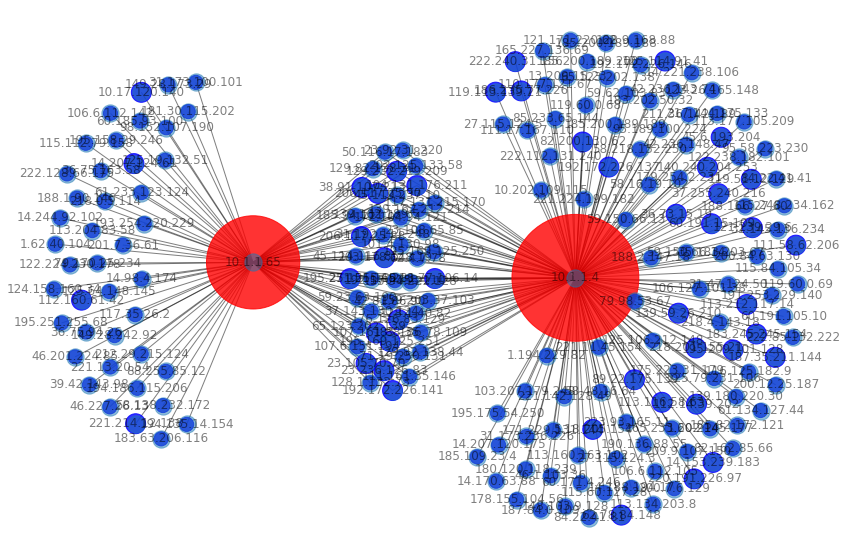

In [7]:
plt.figure(1,figsize=(15,10)) 
plt.axis('off')

# nodes
nx.draw_networkx_nodes(G,pos,
                       nodelist=ip,
                       node_color='r',
                       node_size=[v * 100 for v in dict(ip_Degree).values()],
                   alpha=0.8)
nx.draw_networkx_nodes(G,pos,
                       nodelist=client_ip,
                       node_color='b',
                       node_size=[v * 200 for v in dict(client_ip_Degree).values()],
                   alpha=0.8)

#pos=nx.spring_layout(G)
# edges
nx.draw(G,pos,width=1.0,alpha=0.5,with_labels = True)
plt.savefig('netflows_biparties.png')

In [8]:
def CentralityMeasures(G):
    # Betweenness centrality
    bet_cen = nx.betweenness_centrality(G)
    # Closeness centrality
    clo_cen = nx.closeness_centrality(G)
    # Eigenvector centrality
    eig_cen = nx.eigenvector_centrality(G)
    # Degree centrality
    deg_cen = nx.degree_centrality(G)
    #print bet_cen, clo_cen, eig_cen
    print("# Betweenness centrality:" + str(bet_cen) + "\n")
    print("# Closeness centrality:" + str(clo_cen) + "\n")
    print("# Eigenvector centrality:" + str(eig_cen) + "\n")
    print("# Degree centrality:" + str(deg_cen) + "\n")

In [9]:
CentralityMeasures(G)

# Betweenness centrality:{'188.166.27.60': 0.0, '104.131.176.211': 0.005399401139766234, '31.173.236.226': 0.0, '193.254.220.229': 0.0, '218.77.106.14': 0.005399401139766234, '95.189.100.224': 0.0, '61.134.127.44': 0.0, '23.236.126.83': 0.005399401139766234, '27.151.115.81': 0.005399401139766234, '113.212.117.14': 0.0, '27.115.124.3': 0.0, '31.192.111.248': 0.005399401139766234, '183.245.245.154': 0.0, '218.4.143.18': 0.0, '194.186.115.206': 0.0, '116.125.182.9': 0.0, '203.178.148.19': 0.005399401139766234, '159.203.37.103': 0.005399401139766234, '98.152.107.190': 0.0, '221.11.45.154': 0.0, '14.170.63.88': 0.0, '201.7.36.61': 0.0, '195.251.255.69': 0.005399401139766234, '45.119.237.10': 0.005399401139766234, '113.116.58.63': 0.0, '107.161.88.35': 0.005399401139766234, '125.79.231.106': 0.0, '221.224.199.182': 0.0, '190.136.88.55': 0.0, '192.172.226.141': 0.005399401139766234, '58.138.232.172': 0.0, '65.123.202.138': 0.0, '221.13.20.54': 0.0, '171.229.131.144': 0.0, '187.84.0.109': 0.0,